# **Installing Required Packages**:

*  The code starts by installing the pretty_midi library, which is used for working with MIDI files in a human-readable format.
*   The mido library is also installed for MIDI file processing.

In [1]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
!pip install pretty_midi

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [2]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional
from google.colab import drive
from google.colab import files
import zipfile
from pathlib import Path
from tensorflow.keras.callbacks import ModelCheckpoint


# Setting Seed and Sampling Rate
This code snippet is responsible for setting the seed for both TensorFlow (tf.random.set_seed) and NumPy (np.random.seed). The use of a fixed seed ensures reproducibility in the generation of random numbers, which is crucial for consistent results in machine learning experiments.

Additionally, the _SAMPLING_RATE variable is defined with a value of 48000, representing the sampling rate for audio playback. This parameter is essential for determining the rate at which audio signals are captured or played back, ensuring consistency in audio processing.

In [3]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 48000

# Mounting Google Drive and Accessing MIDI Files


In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Define and Check Folder Path

In this section, the code defines a relative path and constructs the full path to a folder inside Google Drive. It then checks if the specified folder exists and prints a message indicating whether the folder is found or not.

# Process MIDI Files

The code iterates through all files in the specified folder, identifies MIDI files (with a '.mid' extension), and prints a message for each file being processed. It then uses PrettyMIDI to load the MIDI file for further processing.

In [5]:
# Define the relative path to the folder inside Google Drive
relative_path = 'archive'

# Construct the full path
folder_path = Path('/content/drive/MyDrive/Colab Notebooks/') / relative_path

# Check if the folder exists
if folder_path.exists():
    print(f"Folder found at {folder_path}")

    # Iterate through all files in the folder
    for file_path in folder_path.iterdir():
        if file_path.is_file() and file_path.suffix.lower() == '.mid':
            print(f"Processing file: {file_path}")

            # Load the MIDI file using PrettyMIDI
            midi_file = pretty_midi.PrettyMIDI(str(file_path))

else:
    print(f"Folder not found at {folder_path}")

Folder found at /content/drive/MyDrive/Colab Notebooks/archive
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/11.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Lofi MIDI 6 - D Min.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Eternity MIDI 17 - A Maj.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Piano MIDI (4).mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Lofi MIDI 10 - D Maj.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Lofi MIDI 19 - G Maj.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Rhodes MIDI.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Lofi MIDI 12 - E Min.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Lofi MIDI 4 - D Maj.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Eternity MIDI 8 - F Maj.mi

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Processing file: /content/drive/MyDrive/Colab Notebooks/archive/19.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Lofi MIDI 9 - D Maj.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Piano Chords MIDI (2).mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/8.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Piano MIDI (3).mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Piano MIDI (8).mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Eternity MIDI 7 - E Min.mid
Processing file: /content/drive/MyDrive/Colab Notebooks/archive/10.mid


Counting MIDI Files:

Uses glob to search recursively for all files with .mid` extension in a given folder path.
Prints the number of MIDI files found.

In [6]:
# Use glob to count MIDI files
midi_files = glob.glob(str(Path(folder_path) / '**/*.mid*'), recursive=True)
print('Number of MIDI files:', len(midi_files))

Number of MIDI files: 93


Sample file:

Selects the 11th MIDI file from the list (index 10).
Prints the filename of the chosen sample.


In [7]:
sample_file = midi_files[10]
print(sample_file)

/content/drive/MyDrive/Colab Notebooks/archive/Cymatics - Eternity MIDI 11 - A Maj.mid


In [8]:
pm = pretty_midi.PrettyMIDI(sample_file)

Loading and playing audio:

Creates a PrettyMIDI object from the sample file using pretty_midi library.
Defines a function display_audio that uses fluidsynth to render audio for a given duration.
Displays the generated audio using IPython.display.Audio.



In [9]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [10]:
display_audio(pm)

Analyzing Instruments:

Prints the number of instruments in the sample file.
Extracts the first instrument and retrieves its program number.
Converts the program number to a human-readable instrument name using pretty_midi.
Prints the instrument name.


In [11]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


#EXTRACT NOTES

Extracting and displaying note details:

Iterates through the first 10 notes of the selected instrument.

Converts the pitch number of each note to its corresponding note name using pretty_midi.

Calculates the duration of each note by subtracting its start and end times.

Prints the index, pitch, note name, and duration of each note.

In [12]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=61, note_name=C#4, duration=0.2500
1: pitch=73, note_name=C#5, duration=0.2500
2: pitch=85, note_name=C#6, duration=0.2500
3: pitch=52, note_name=E3, duration=0.3750
4: pitch=57, note_name=A3, duration=0.3750
5: pitch=59, note_name=B3, duration=0.3750
6: pitch=71, note_name=B4, duration=0.1250
7: pitch=83, note_name=B5, duration=0.1250
8: pitch=61, note_name=C#4, duration=0.1146
9: pitch=30, note_name=F#1, duration=0.5000


Extract the notes from the sample MIDI file.

Converting MIDI to Notes DataFrame:

Defines a function midi_to_notes that takes a MIDI file path as input.

Creates a PrettyMIDI object from the specified MIDI file.

Extracts the first instrument from the PrettyMIDI object.

Initializes an empty collections.defaultdict to store note information.

Processing and storing note data.

Creating a Pandas DataFrame.

In [13]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

Extracting Note Names:

Converts the pitch values from the raw_notes DataFrame using the vectorized get_note_names function.

Creates an array of note names corresponding to the pitch values.

Prints the first 10 note names to demonstrate the conversion.

In [14]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

pitch  start    end  step  duration
0     61    0.0  0.250   0.0     0.250
1     73    0.0  0.250   0.0     0.250
2     85    0.0  0.250   0.0     0.250
3     52    0.0  0.375   0.0     0.375
4     57    0.0  0.375   0.0     0.375

In [15]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['C#4', 'C#5', 'C#6', 'E3', 'A3', 'B3', 'F#1', 'B4', 'B5', 'C#4'],
      dtype='<U3')

Visualizing Piano Roll:

Defines a function plot_piano_roll that takes a DataFrame of notes and an optional count as input.

Creates a figure with adjustable dimensions.

Stacks the pitch and start-stop time values into a 2D array.

Plots the pitch and start-stop time values as a series of connected dots.

Sets the axis labels and title based on the provided count.

Calls plot_piano_roll to visualize the first 70 notes and the entire track.


In [16]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

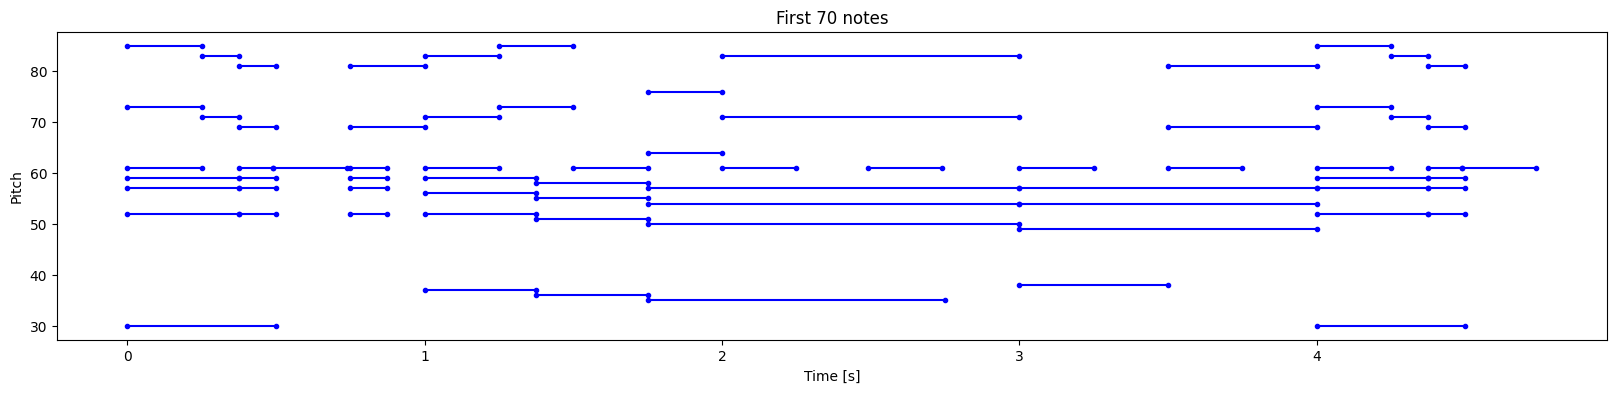

In [17]:
plot_piano_roll(raw_notes, count=70)

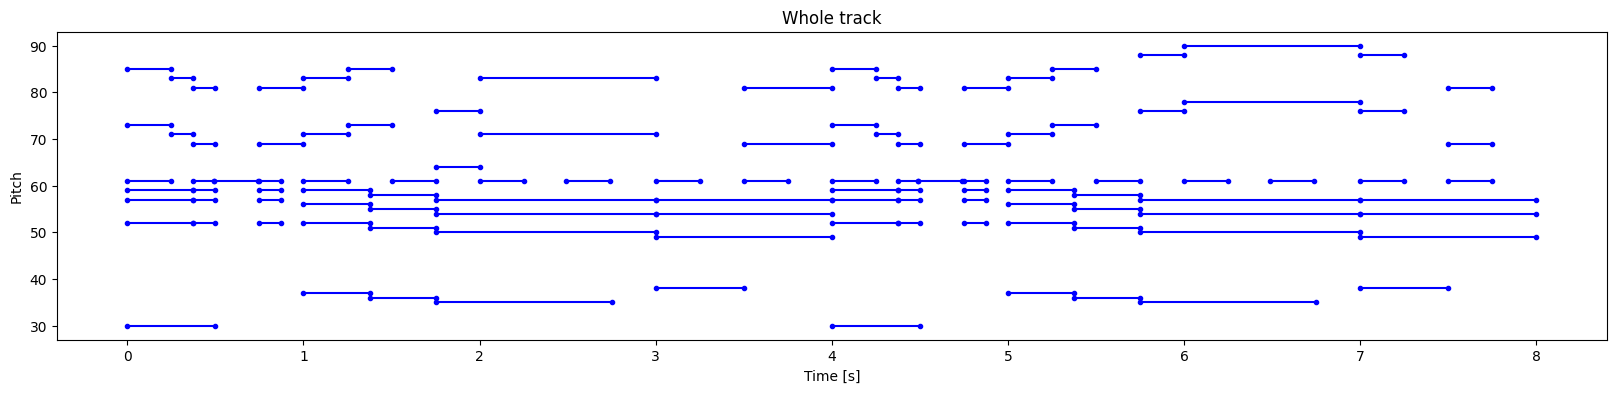

In [18]:
plot_piano_roll(raw_notes)

Analyzing Note Distributions:

Defines a function plot_distributions that takes a DataFrame of notes and an optional drop percentile as input.

Creates a figure with subplots for pitch, step, and duration distributions.

Plots a histogram of pitch distribution using sns.histplot.

Filters step values to remove outliers and plots a histogram of step distribution using sns.histplot.

Filters duration values to remove outliers and plots a histogram of duration distribution using sns.histplot.

Calls plot_distributions to visualize the distributions of pitch, step, and duration.


In [19]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

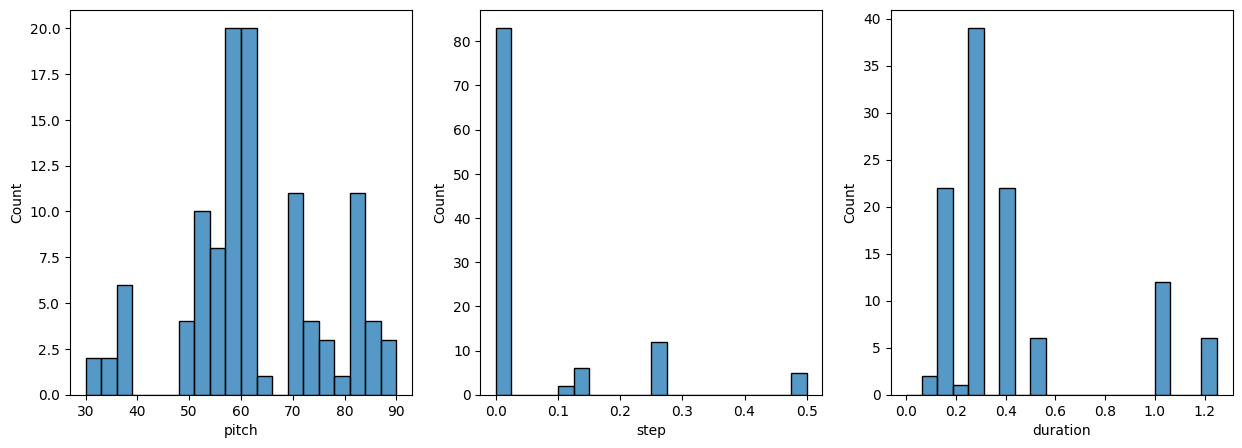

In [20]:
plot_distributions(raw_notes)

1. Creating a PrettyMIDI Object:

Defines a function notes_to_midi that takes a DataFrame of notes, output filename, instrument name, and optional velocity as input.

Creates a new PrettyMIDI object.
Initializes an instrument using pretty_midi and sets the instrument name using pretty_midi.instrument_name_to_program.

2. Constructing and adding notes:

Initializes a variable prev_start to keep track of the previous note's start time.

Iterates through the rows of the notes DataFrame.
Calculates the start and end times of each note based on its step and duration.

Creates a pretty_midi.Note object with the calculated start, end, pitch, and velocity.
Appends the created note to the instrument's notes list.

Updates prev_start with the current note's start time.

3. Writing the MIDI file:

Adds the instrument to the PrettyMIDI object.

Writes the PrettyMIDI object to the specified output file (example.midi in this case).

Returns the generated PrettyMIDI object.

4. Generating and playing new MIDI file:

Creates an output file named 'example.midi'.

Converts the raw_notes DataFrame into a MIDI file using notes_to_midi with instrument name and optional velocity.

Displays the generated audio using display_audio.

In [21]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [22]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

In [23]:
display_audio(example_pm)

### **Preparing Data for Sequence Modeling**

**Extracting and Combining Notes from Multiple MIDI Files**

The code defines num_files as the number of MIDI files to process (set to 5 in the current example).

It iterates through the first num_files MIDI files in the midi_files list using a for loop.
For each MIDI file, it extracts the note information using the midi_to_notes function and stores it in a list called all_notes.

Finally, it concatenates the note information from all MIDI files using pd.concat, resulting in a single DataFrame all_notes.

In [24]:
num_files = 5
all_notes = []
for f in midi_files[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

Creating Sequences and Targets

The code calculates the total number of notes using n_notes = len(all_notes).

It defines a list of key features to use for sequence modeling: key_order = ['pitch', 'step', 'duration'].

It extracts the features and target values from the all_notes DataFrame and stacks them into a 3D array train_notes.

It creates a TF Dataset notes_ds from the train_notes array.

In [25]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 153


In [26]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [27]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

Generating Sequences and Labels

The code defines a function create_sequences that takes a TF Dataset, sequence length, and optional vocabulary size as input.

It creates a sliding window of sequences with a length of seq_length + 1 (including the target note) and a stride of 1.

It flattens the windowed dataset into a single dataset of sequences.
It normalizes the note pitch values by dividing them by the vocabulary size.

It splits the sequences into input features and target labels using a custom split_labels function.

It returns the TF Dataset containing the input sequences and target labels.

In [28]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = tf.cast(x, tf.float32)  # Explicitly cast to tf.float32
    x = x / tf.constant([vocab_size, 1.0, 1.0], dtype=tf.float32)
    return x


  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [29]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float32, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

Examining Sequences and Targets

The code extracts a sample sequence and its corresponding target using for seq, target in seq_ds.take(1).

It prints the shape of the sequence (seq.shape) and the first 10 elements of the sequence (seq[0: 10]).

It prints the target dictionary (target).

In [30]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.3359375  0.         0.19791667]
 [0.484375   0.         0.19791667]
 [0.5234375  0.         0.19791667]
 [0.5546875  0.         0.19791667]
 [0.609375   0.         0.19791667]
 [0.5546875  0.7395833  0.20833333]
 [0.5234375  0.25       0.20833333]
 [0.484375   0.5        0.20833333]
 [0.4140625  0.5        0.20833333]
 [0.5078125  0.         0.20833333]], shape=(10, 3), dtype=float32)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=65.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.21354166666666696>}


In [31]:
batch_size = 32
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [32]:
train_ds.element_spec

(TensorSpec(shape=(32, 25, 3), dtype=tf.float32, name=None),
 {'pitch': TensorSpec(shape=(32,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(32,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(32,), dtype=tf.float64, name=None)})

In [33]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [34]:
!pip install keras_tuner --upgrade

#Create model and train

Custom Loss Function:

The code defines a custom loss function mse_with_positive_pressure that combines the Mean Squared Error (MSE) with a pressure term.

The pressure term penalizes negative predictions for step and duration, encouraging the model to predict positive values.

This is important for ensuring realistic note durations and preventing negative step values (going backwards in time).


In [35]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

Creating the LSTM Model:

* The create_lstm_model function takes input shape, learning rate, and optional LSTM units as input.

* It defines a Keras model with an LSTM layer followed by separate Dense layers for each output feature (pitch, step, duration).

* Each output layer has a different loss function:
Pitch uses Sparse Categorical Crossentropy for handling discrete pitch values.
* Step and duration use the custom mse_with_positive_pressure function to penalize negative predictions.
The model is compiled with the defined loss functions and the Adam optimizer.


In [36]:
input_shape = (seq_length,3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128)                  67584     ['input_1[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm[0][0]']                
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm[0][0]']                
                                                                                              

 Initial Model Evaluation:

The code calls model.evaluate on the train_ds dataset with return_dict=True.

This prints the individual and combined losses for each output feature, indicating the initial performance on the training data.

In [37]:
losses = model.evaluate(train_ds, return_dict=True)
losses

4/4 [==============================] - 8s 28ms/step - loss: 8.7080 - duration_loss: 1.3310 - pitch_loss: 4.8553 - step_loss: 2.5217


{'loss': 8.707993507385254,
 'duration_loss': 1.3310394287109375,
 'pitch_loss': 4.855290412902832,
 'step_loss': 2.5216634273529053}

Adjusting Loss Weights:

The code recompiles the model with adjusted loss weights.

It sets a lower weight for pitch (0.05) compared to step and duration (1.0 each).

This emphasizes the importance of accurate step and duration predictions while still considering pitch.

In [38]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

Re-evaluation with Adjusted Weights:

The code calls model.evaluate again with the updated loss weights.

This prints the updated individual and combined losses, showing the impact of the weight adjustments.

In [39]:
model.evaluate(train_ds, return_dict=True)

4/4 [==============================] - 2s 18ms/step - loss: 4.0955 - duration_loss: 1.3310 - pitch_loss: 4.8553 - step_loss: 2.5217


{'loss': 4.0954670906066895,
 'duration_loss': 1.3310394287109375,
 'pitch_loss': 4.855290412902832,
 'step_loss': 2.5216634273529053}

# **Model Training and Performance Visualization**

Callbacks for Training:

The code defines a list of callbacks used during model training:

ModelCheckpoint: Saves model weights every epoch at ./training_checkpoints/ckpt_{epoch} (saves weights only, not optimizer state).

EarlyStopping: Stops training if the validation loss (monitored metric: loss) plateaus for 5 epochs with verbose=1 logging and automatically restores the best weights achieved so far.

In [40]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

Training the Model:

The code calls model.fit with the train_ds dataset for epochs=50 iterations.

It passes the callbacks list to the fit function for checkpointing and early stopping.

In [41]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
4/4 [==============================] - 8s 88ms/step - loss: 2.3972 - duration_loss: 1.1219 - pitch_loss: 4.8040 - step_loss: 1.0350
Epoch 2/50
4/4 [==============================] - 0s 40ms/step - loss: 1.1178 - duration_loss: 0.5858 - pitch_loss: 4.6378 - step_loss: 0.3001
Epoch 3/50
4/4 [==============================] - 0s 60ms/step - loss: 1.0099 - duration_loss: 0.5282 - pitch_loss: 4.5169 - step_loss: 0.2558
Epoch 4/50
4/4 [==============================] - 0s 55ms/step - loss: 0.9627 - duration_loss: 0.4888 - pitch_loss: 4.3983 - step_loss: 0.2540
Epoch 5/50
4/4 [==============================] - 0s 69ms/step - loss: 0.9131 - duration_loss: 0.4550 - pitch_loss: 4.2493 - step_loss: 0.2456
Epoch 6/50
4/4 [==============================] - 0s 43ms/step - loss: 0.8826 - duration_loss: 0.4341 - pitch_loss: 4.1349 - step_loss: 0.2418
Epoch 7/50
4/4 [==============================] - 0s 31ms/step - loss: 0.8611 - duration_loss: 0.4097 - pitch_loss: 4.0295 - step_loss: 0.2500

Interpreting the Plot:

The plot helps analyze how the model's performance changes over time.

Ideally, the loss should decrease steadily, indicating improvement in predicting the next note features.

Plateaus or sudden jumps might suggest issues like overfitting or training instability.

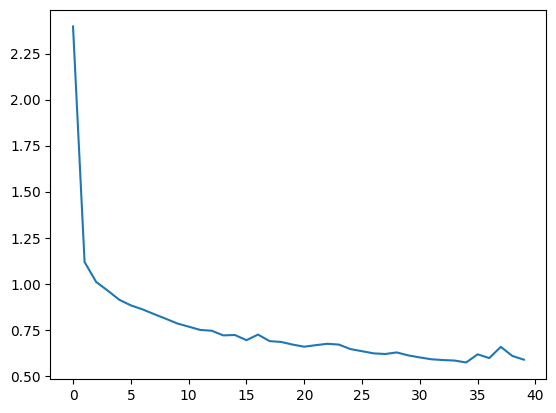

In [42]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

#Generating Music and Saving Model

Predicting Next Note:

The predict_next_note function takes a preprocessed note sequence, the trained model, and an optional temperature as input.


It expands the input sequence to add a batch dimension.


It predicts pitch, step, and duration using the model and the specified temperature for sampling.


It applies temperature scaling to the pitch logits and samples a pitch value using a categorical distribution.


It ensures non-negative values for step and duration.


It returns the predicted pitch (int), step (float), and duration (float) as a tuple.

In [43]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 2.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

Generating Music Sequence:


The code sets a temperature of 3 for generating music with some randomness.

It defines the number of predictions to generate (130 in this case).

It extracts the initial sequence of notes from raw_notes and normalizes the pitch for prediction.

It uses a loop to iteratively predict the next note and update the sequence:

It predicts the next pitch, step, and duration.

It calculates the start and end time based on the predicted step and duration.

It adds the predicted note to the generated notes list.

It updates the input sequence by removing the first note and adding the predicted note.

It updates the prev_start variable for calculating subsequent note start times.

In [44]:
temperature = 3
num_predictions = 130

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 48ms/step


In [45]:
generated_notes.head(10)

pitch      step  duration     start       end
0     47  0.207349  0.801018  0.207349  1.008366
1     72  0.938349  0.784030  1.145697  1.929727
2     79  0.838421  0.897422  1.984119  2.881541
3     47  0.761603  0.889035  2.745722  3.634757
4     60  0.890537  1.077142  3.636259  4.713401
5     12  0.840709  0.985189  4.476968  5.462156
6     50  1.081207  1.701430  5.558174  7.259604
7     74  0.988886  1.253349  6.547060  7.800409
8    101  0.835734  1.082689  7.382794  8.465483
9     52  0.708000  1.055535  8.090793  9.146328

In [46]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

Saving Model Weights and Architecture:


The model weights are saved using model.save_weights to a file named "model_weights.h5".


The model architecture is saved as JSON using model.to_json and stored in "model_architecture.json".

In [47]:
# Save model weights
model.save_weights('model_weights.h5')

In [48]:
# Save model architecture
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model.to_json())

# **Retrained model**

This code uses Keras Tuner to search for optimal hyperparameters for a music generation model. It defines a neural network with LSTM layers for pitch prediction. The search is configured to find the best combination of LSTM units and learning rates. Data is prepared, and the tuner performs a hyperparameter search. The best hyperparameters are then retrieved for building the optimal model.

In [49]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the hypermodel for Keras Tuner
def build_hypermodel(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=64), input_shape=(seq_length, 3)))
    model.add(Dense(128, activation='softmax', name='pitch'))

    learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-3, 1e-2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        loss={
            'pitch': tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        },
        optimizer=optimizer,
        metrics={'pitch': 'accuracy'},
    )
    return model

# Instantiate the tuner with the specified objective
# Instantiate the tuner with the specified objective
tuner = kt.Hyperband(
    build_hypermodel,
    objective=kt.Objective("accuracy", direction="max"),  # Use the appropriate metric
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='music_generation_tuner'
)


# Convert train_ds to numpy arrays
features = np.concatenate([x.numpy() for x, y in train_ds], axis=0)
labels_pitch = np.concatenate([y['pitch'].numpy() for x, y in train_ds], axis=0)
labels_step = np.concatenate([y['step'].numpy() for x, y in train_ds], axis=0)
labels_duration = np.concatenate([y['duration'].numpy() for x, y in train_ds], axis=0)

# Perform the hyperparameter search
tuner.search(features, {'pitch': labels_pitch}, epochs=10, validation_split=0.2)


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 18 Complete [00h 00m 04s]
accuracy: 0.06862745434045792

Best accuracy So Far: 0.0882352963089943
Total elapsed time: 00h 01m 08s


The code retrieves the best hyperparameters from the Keras Tuner Oracle and prints them. It obtains the hyperparameter values for the top-performing trial based on the specified metric.







In [50]:
# Get the best hyperparameters
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hps)


Best Hyperparameters: {'units': 192, 'learning_rate': 0.005, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


Saving Model Weights and Architecture:

The model weights are saved using model.save_weights to a file named "model_weights.h5".

The model architecture is saved as JSON using model.to_json and stored in "model_architecture.json".

In [51]:
# Save model weights
model.save_weights('best_model_weights.h5')

In [52]:
# Save model architecture
with open('best_model_architecture.json', 'w') as json_file:
    json_file.write(model.to_json())